<b>Data Description:</b><br>
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).

<b>Context:</b><br>
Concrete is the most important material in civil engineering. The concrete
compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.

<b>Attribute Information:</b><br>

Cement: measured in kg in a m3 mixture<br>
Blast: measured in kg in a m3 mixture<br>
Fly ash: measured in kg in a m3 mixture<br>
Water: measured in kg in a m3 mixture<br>
Superplasticizer: measured in kg in a m3 mixture<br>
Coarse Aggregate: measured in kg in a m3 mixture<br>
Fine Aggregate: measured in kg in a m3 mixture<br>
Age: days<br>
Concrete compressive strength: measured in MPa<br>

<b>Objective:</b>
Modeling of strength of high performance concrete using Machine Learning

In [2]:
%run ../utils/common_utils.ipynb

In [10]:
concreteDf = pd.read_csv('concrete.csv')

# Eye balling data

In [11]:
concreteDf.head().T

,0,1,2,3,4
cement,141.30,168.90,250.00,266.00,154.80
slag,212.00,42.20,0.00,114.00,183.40
ash,0.00,124.30,95.70,0.00,0.00
water,203.50,158.30,187.40,228.00,193.30
superplastic,0.00,10.80,5.50,0.00,9.10
coarseagg,971.80,1080.80,956.90,932.00,1047.40
fineagg,748.50,796.20,861.20,670.00,696.70
age,28.00,14.00,28.00,28.00,28.00
strength,29.89,23.51,29.22,45.85,18.29


In [12]:
concreteDf.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [13]:
concreteDf.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<b>Shape of data :</b>

In [14]:
print(getShapeText(concreteDf))

The dataset has 1030 rows and 9 columns


<b>Missing values heatmap</b>

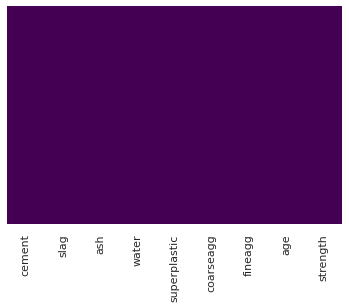

In [15]:
sns.heatmap(concreteDf.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [16]:
concreteDf.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

<b>Percentage per column have value as zero</b>

In [17]:
(concreteDf[concreteDf==0].count(axis=0)/len(concreteDf.index) ) * 100 

cement           0.000000
slag            45.728155
ash             54.951456
water            0.000000
superplastic    36.796117
coarseagg        0.000000
fineagg          0.000000
age              0.000000
strength         0.000000
dtype: float64

<h4>Observations 1:</h4><br>


<ol>
    <li>There are 9 variables in data, of which <b>'strength'</b> is the target of dependent variable. Remaining 8 variables are independent varaibles.</li>
    <li>Since we need to figure out 'strength' which is a numeric value hence this is a <b>regression problem</b>.</li>
    <li>The shape of the data is 1030 rows and 9 columns.</li>
    <li>There are <b>no missing values</b> in the data. Also the data doesn't seem to have any unwanted values.</li>
    <li>Slag , ash and superplastic have a significant amount of zeros.</li>
    
    
    
</ol>





# Univariate and Bivariate analysis 

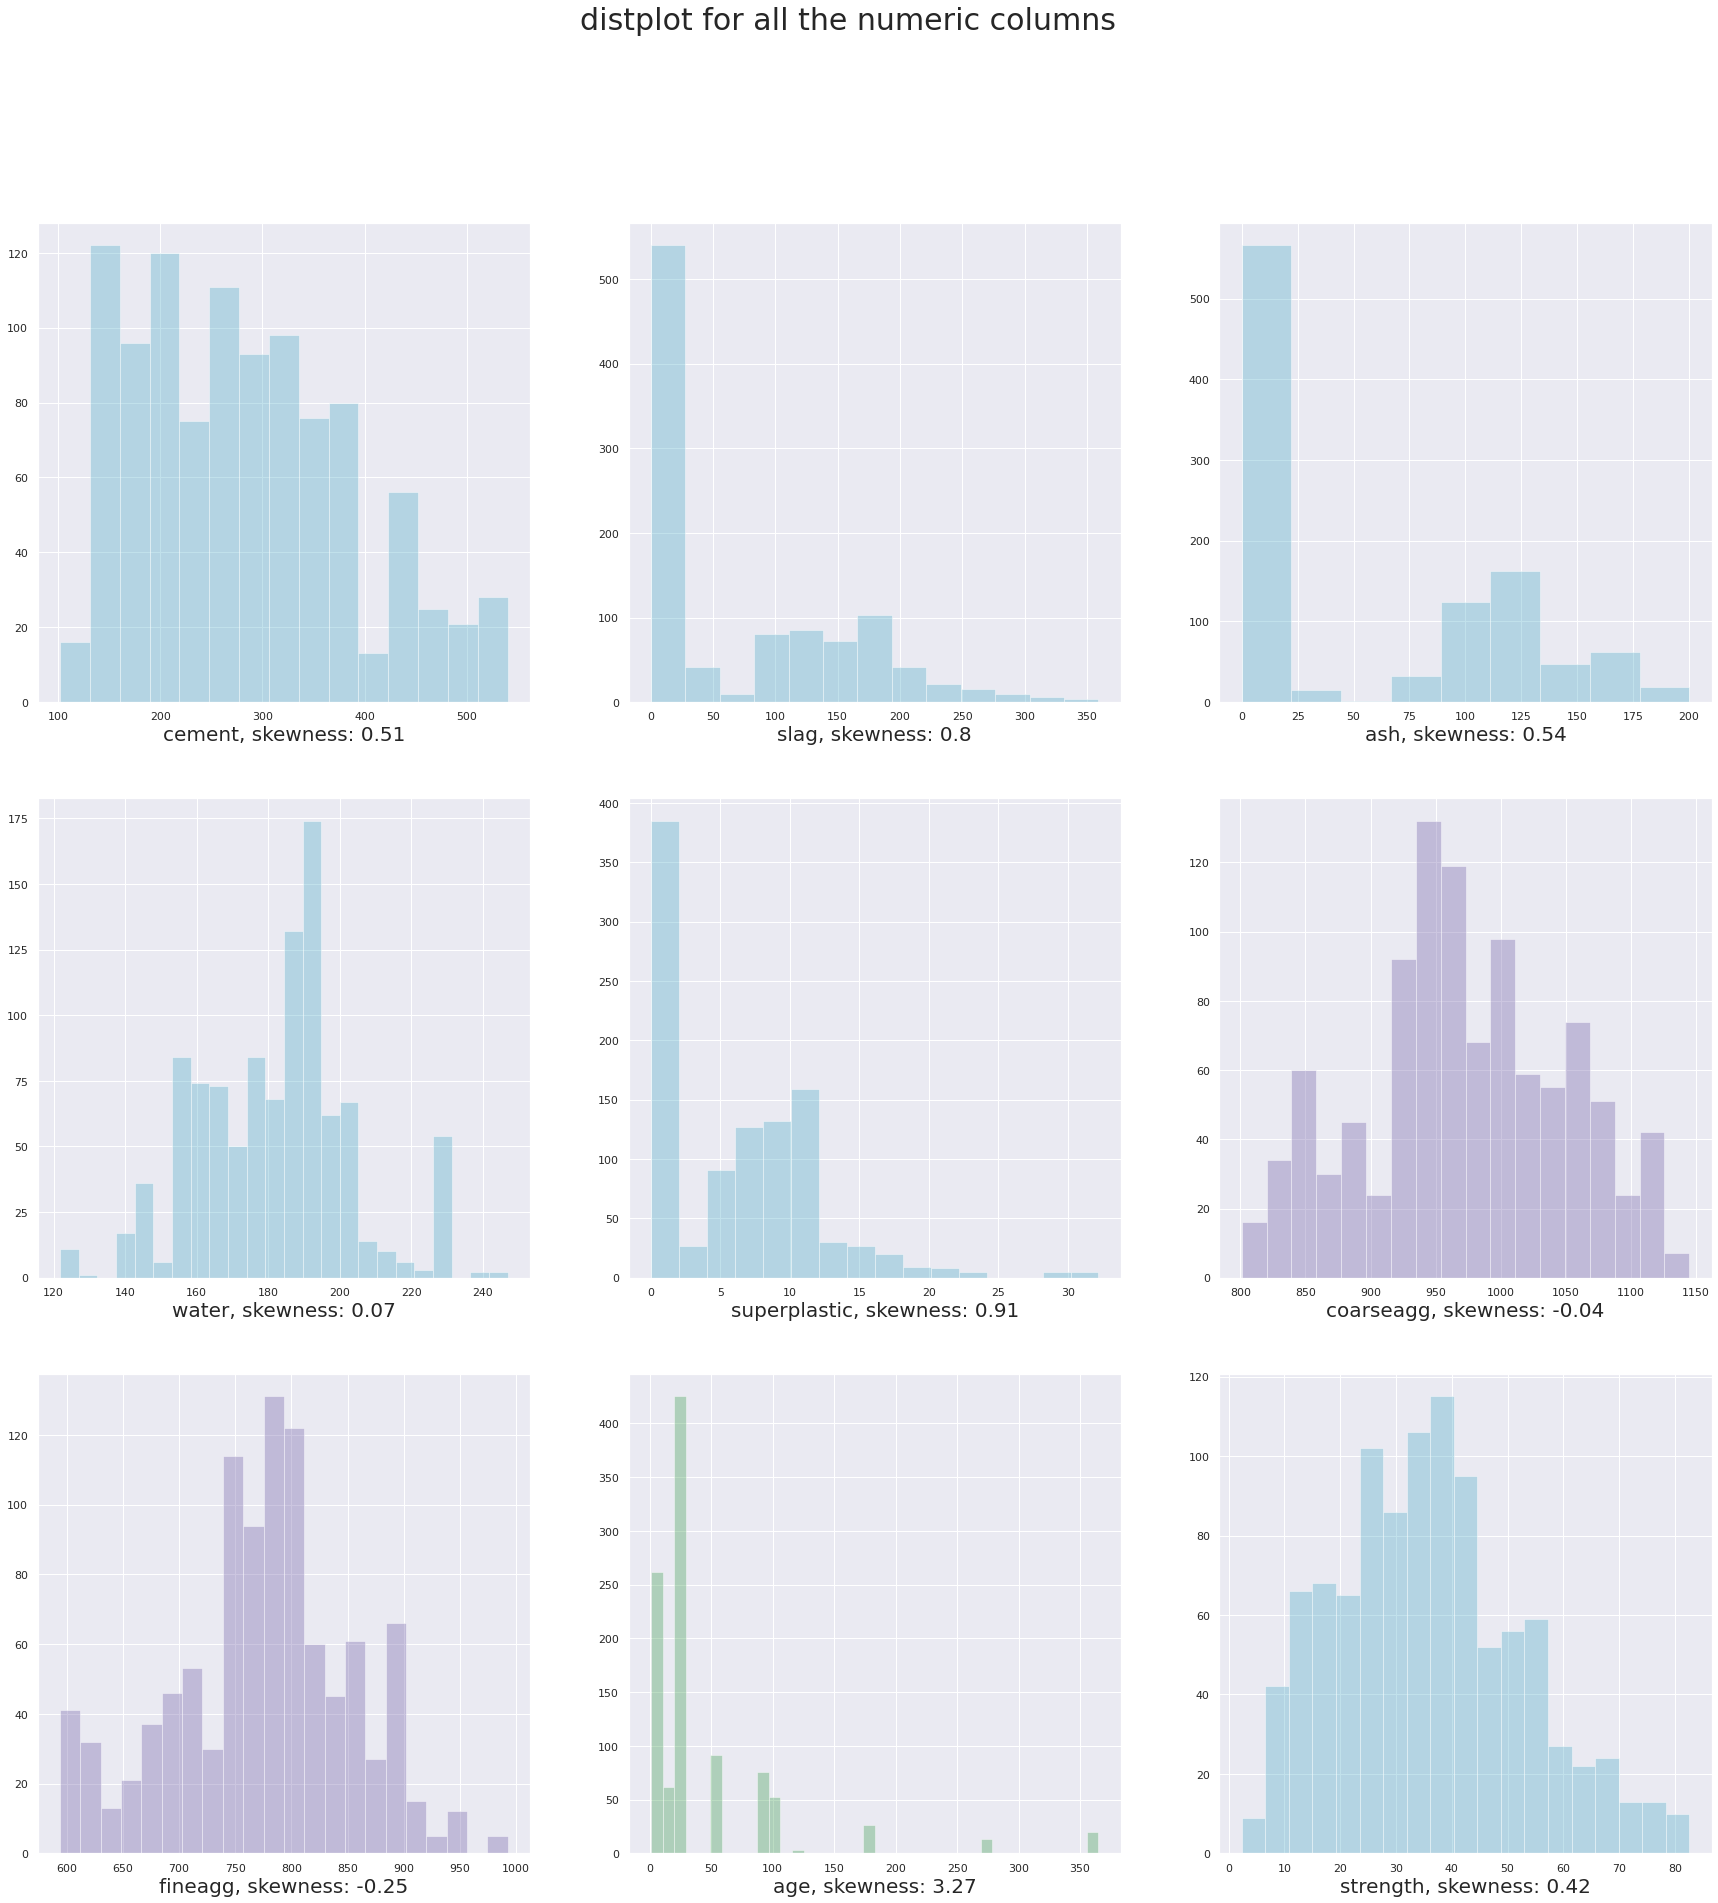

In [18]:
print_plots(concreteDf,plot='dist')

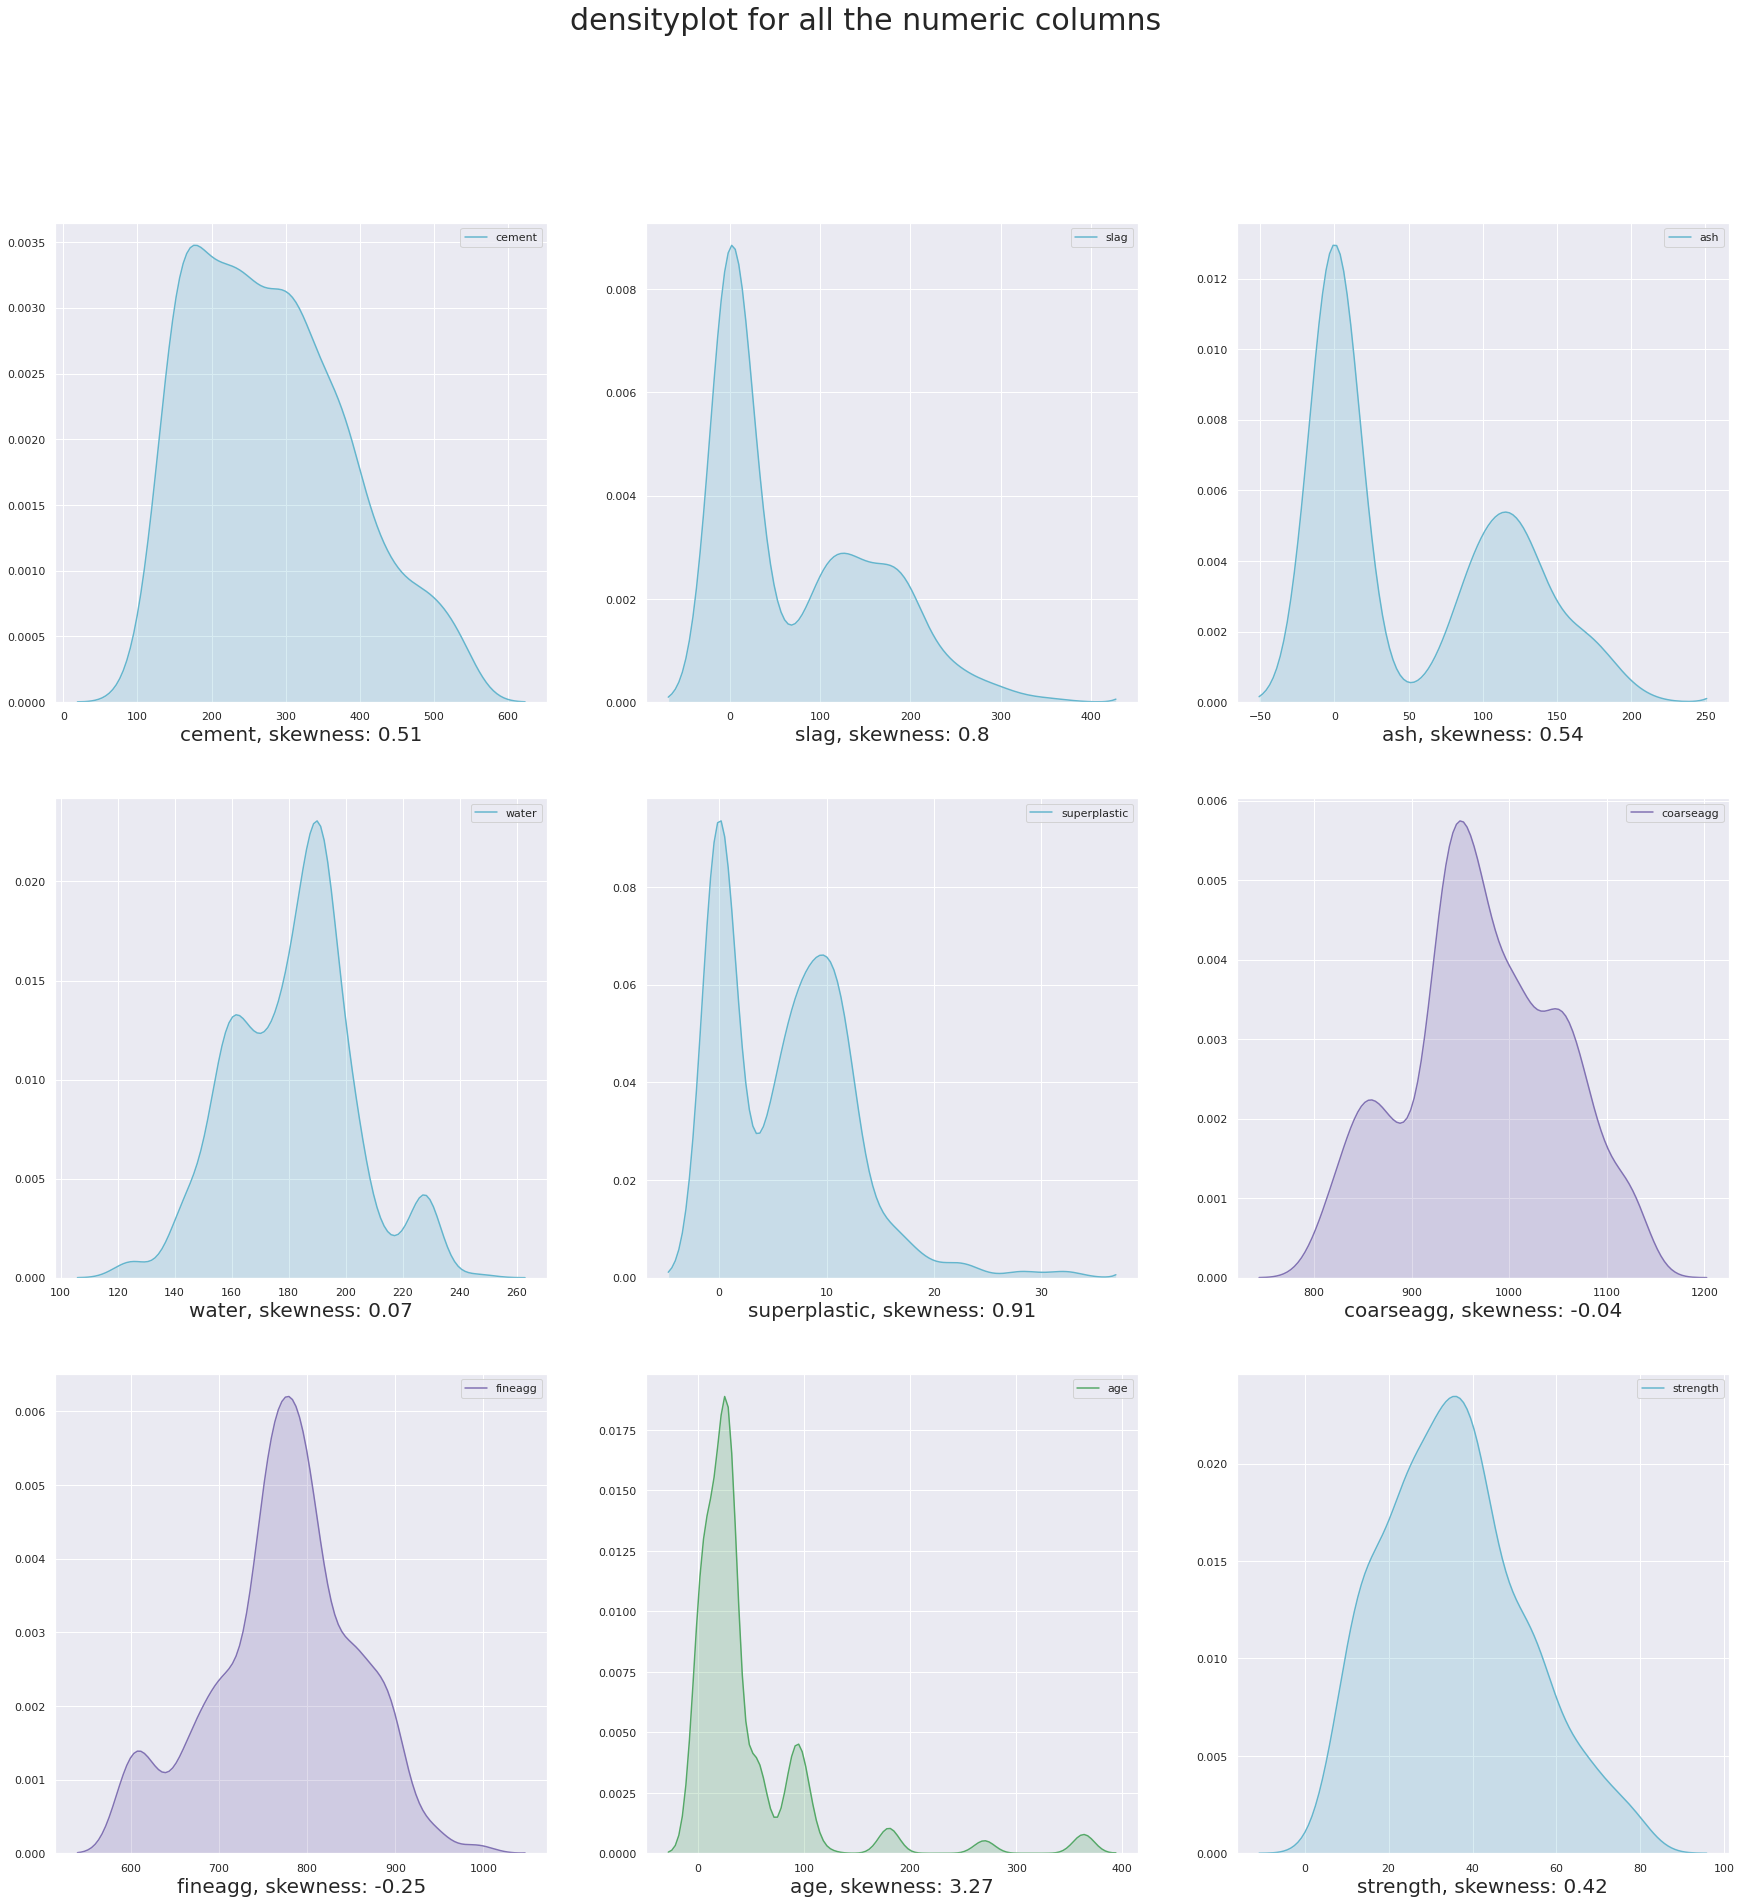

In [19]:
print_plots(concreteDf,plot='density')

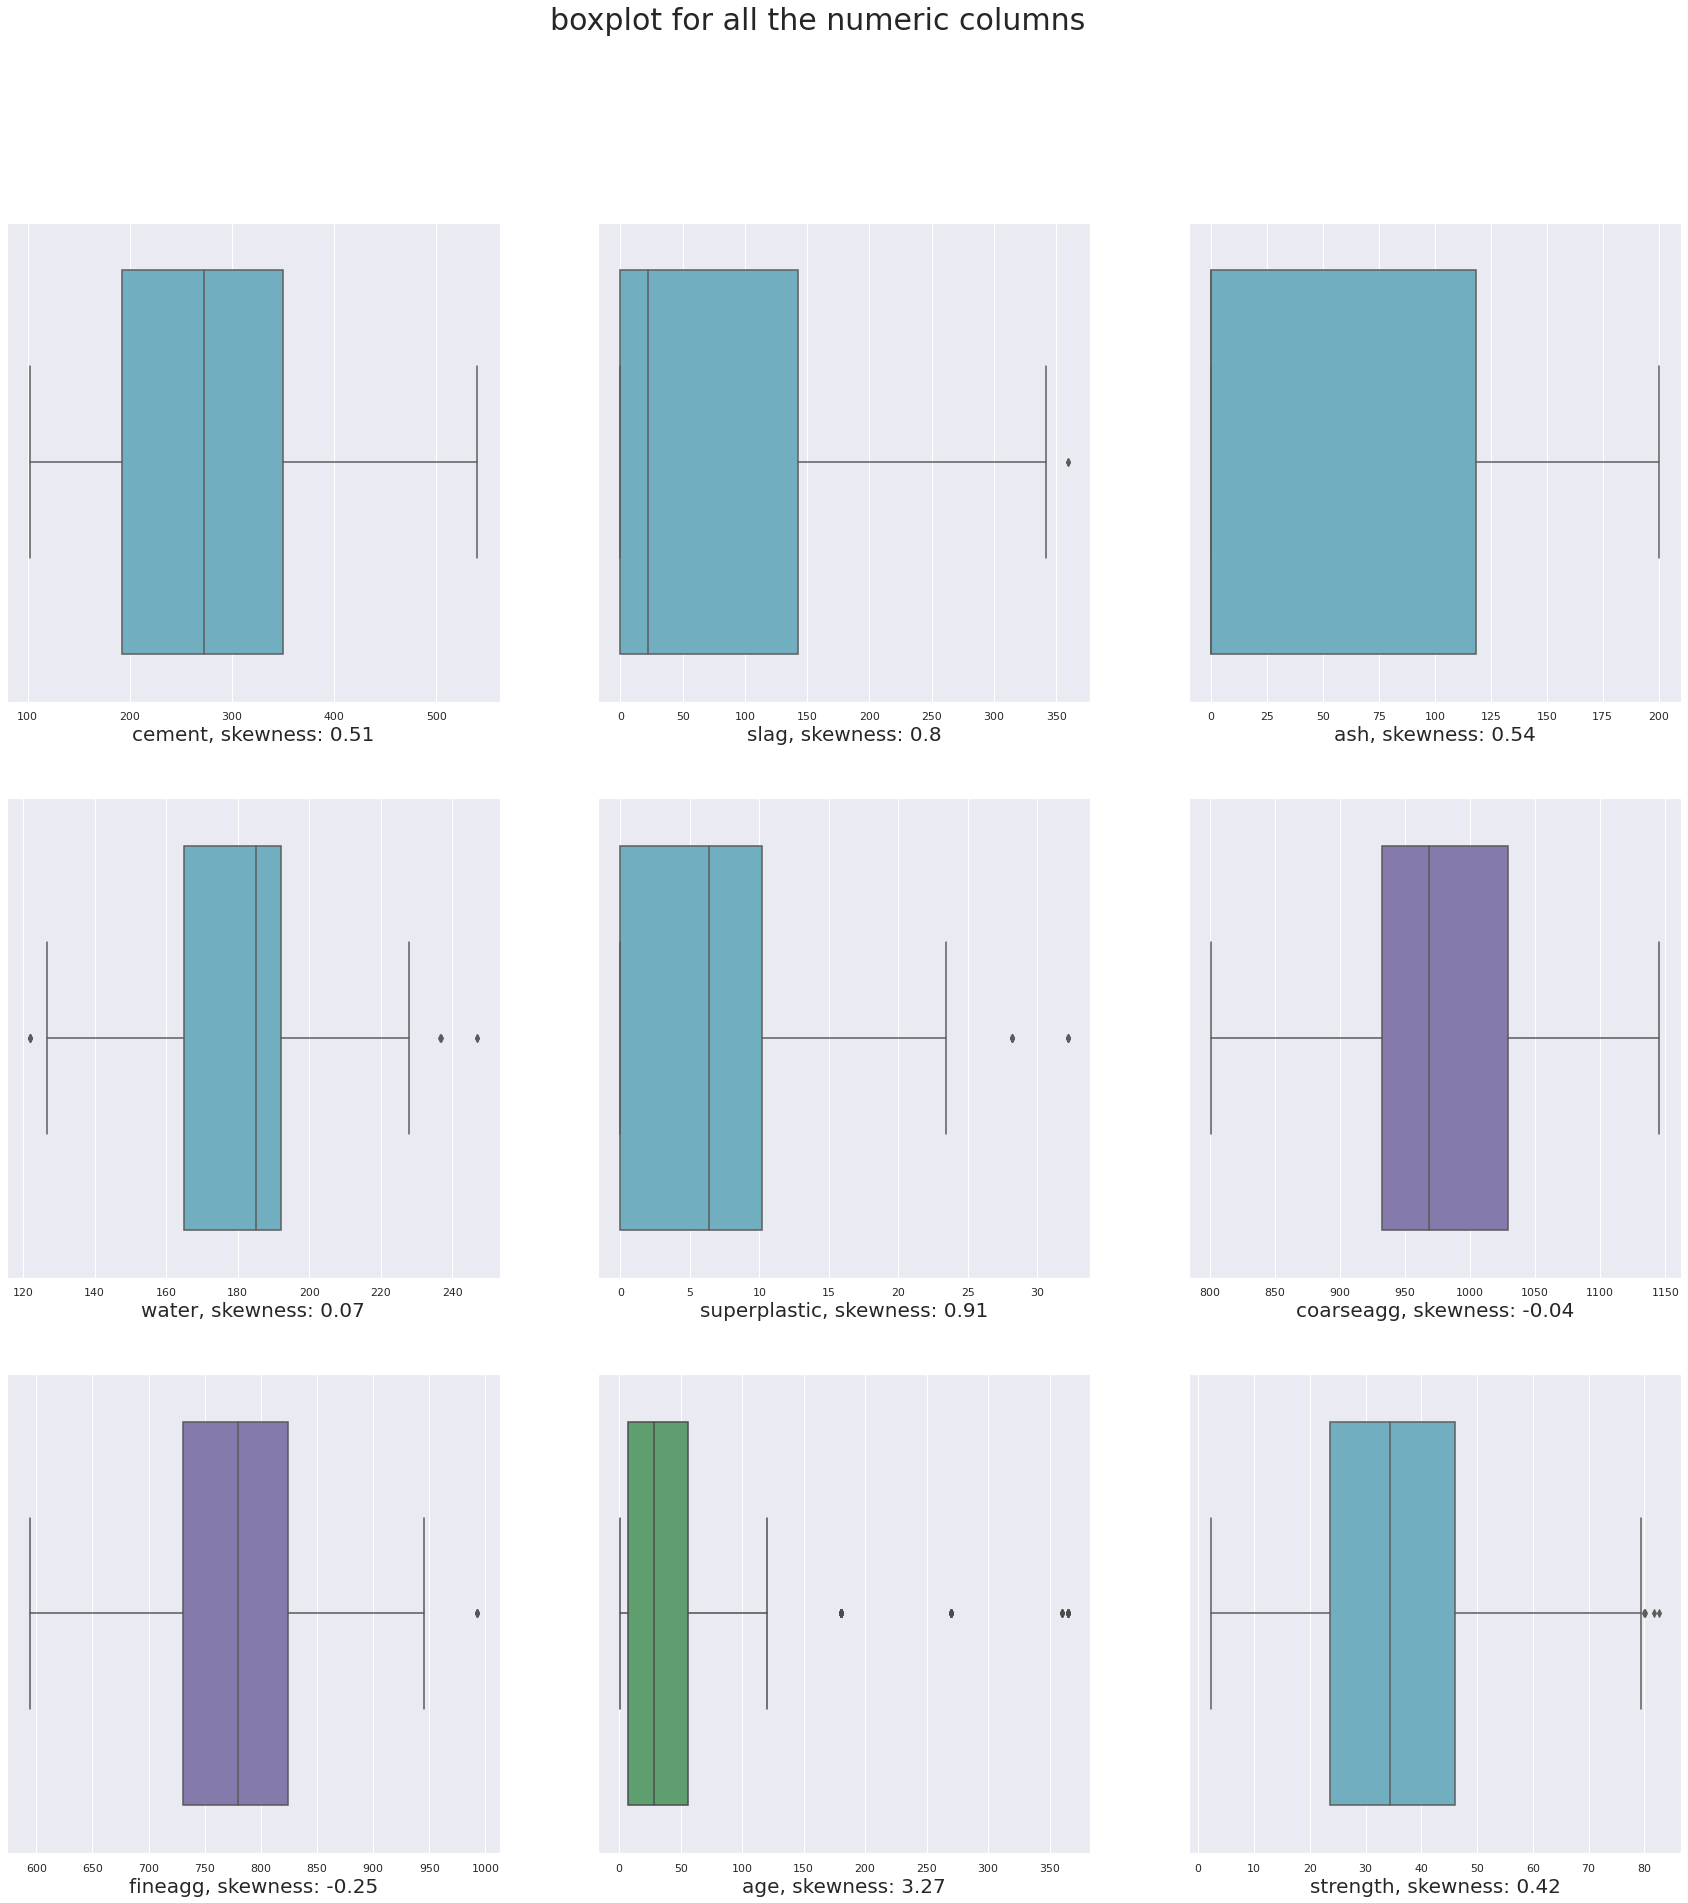

In [20]:
print_plots(concreteDf,plot='box')

<h4>Observations 2: Based on histograms , box plots and density curve</h4><br>
<ol>
    <li>There are a few columns where are distributon is not uniform and lot of the columns have outliers. So scaling data will be essential.</li>
    <li>From the density peaks we infer that there is a possiblity of 5 or more distinct clusters of data. </li>
    
    
</ol>






<b>Pair plot</b>

<Figure size 936x504 with 0 Axes>

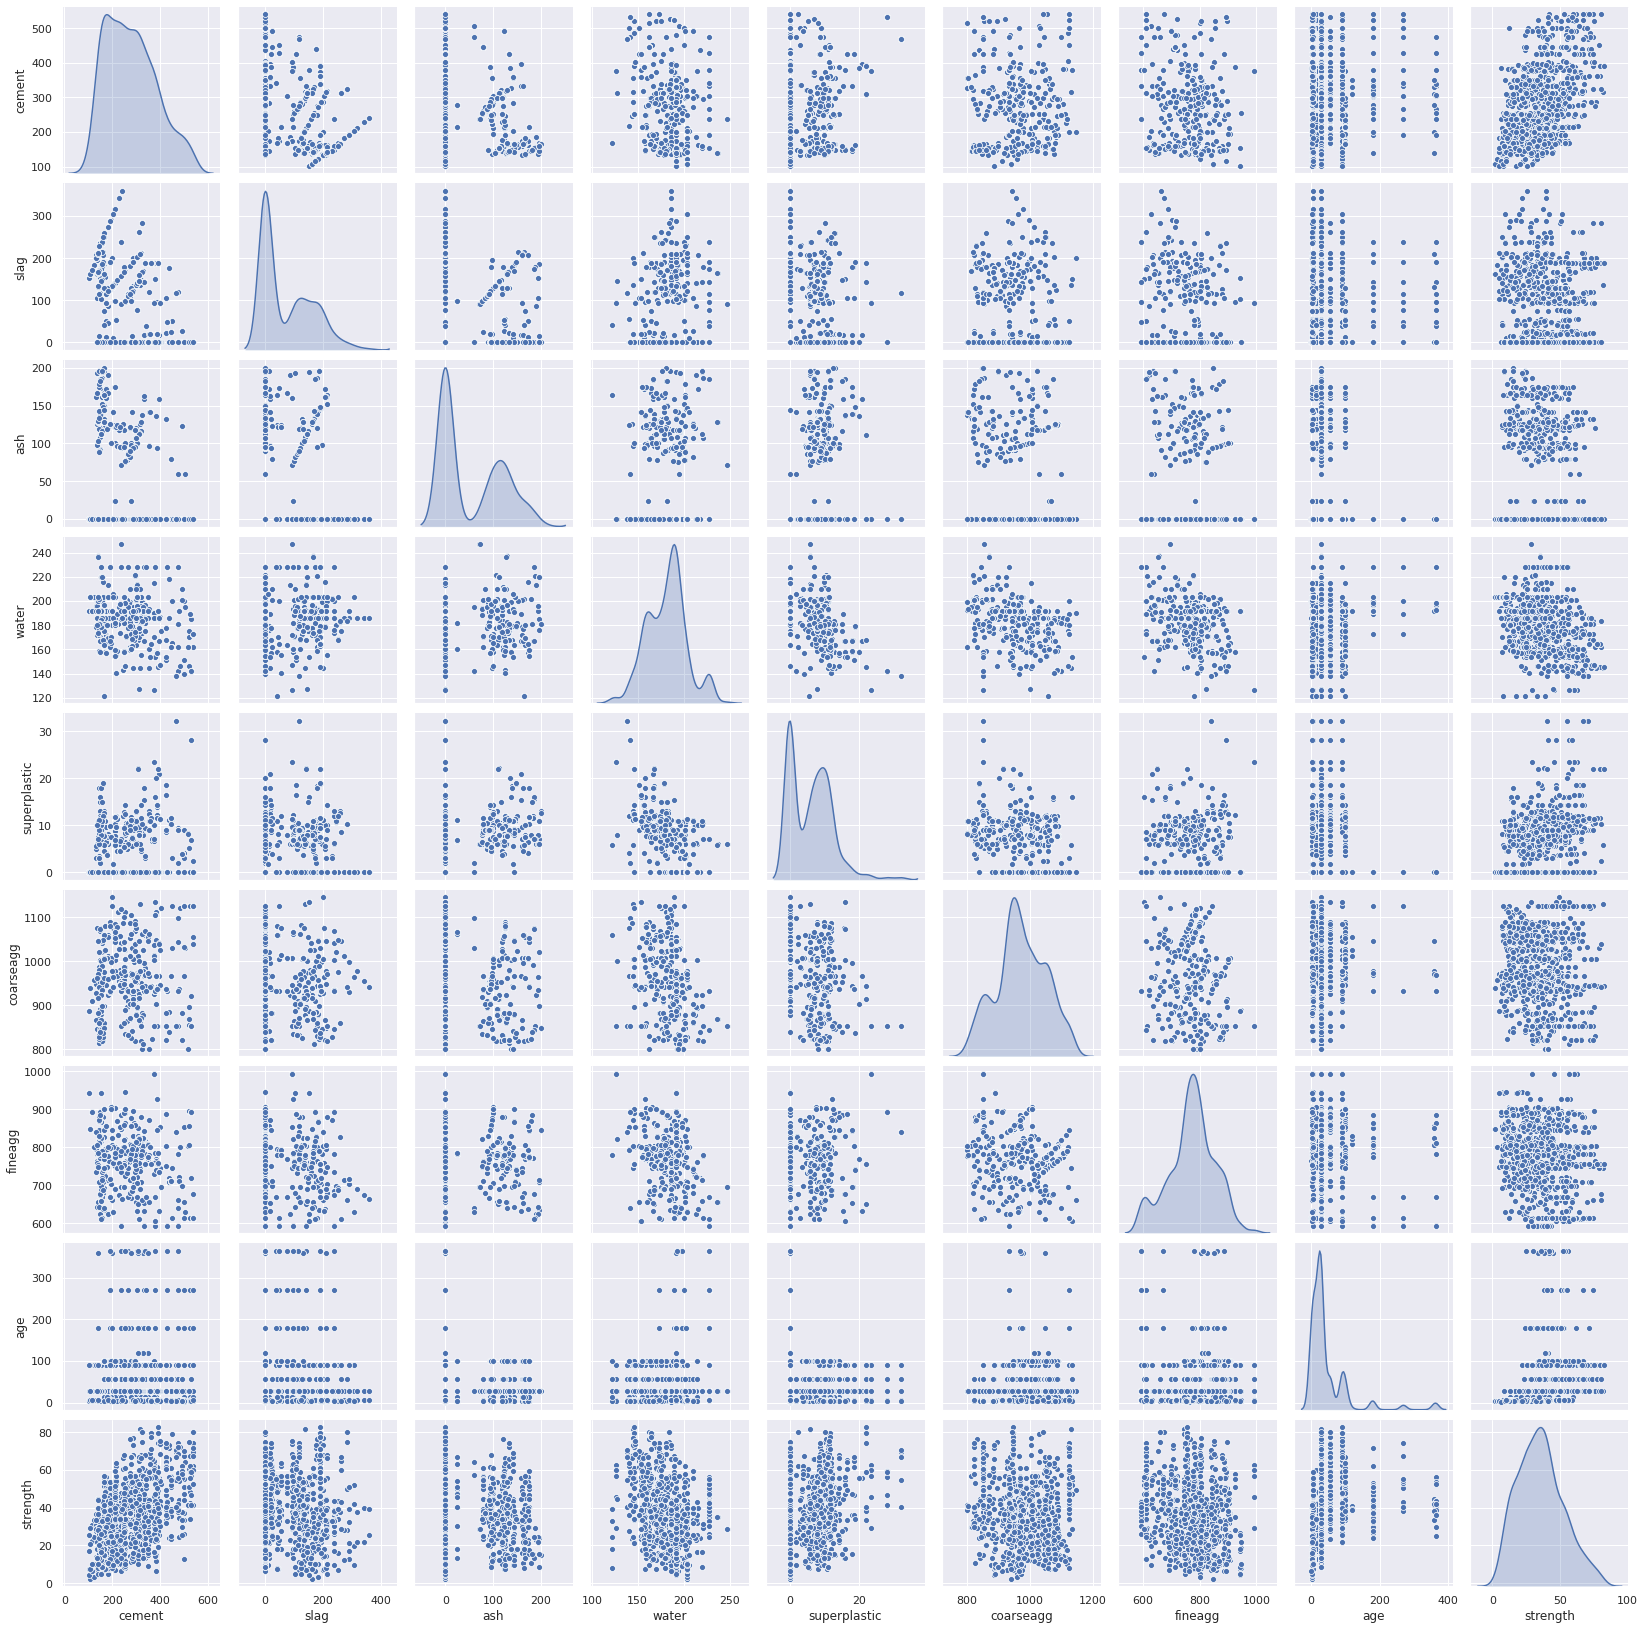

In [21]:
plt.figure(figsize=(13,7));
sns.pairplot(concreteDf,diag_kind='kde');

# Correlation matrix

In [22]:
corr = concreteDf.corr()

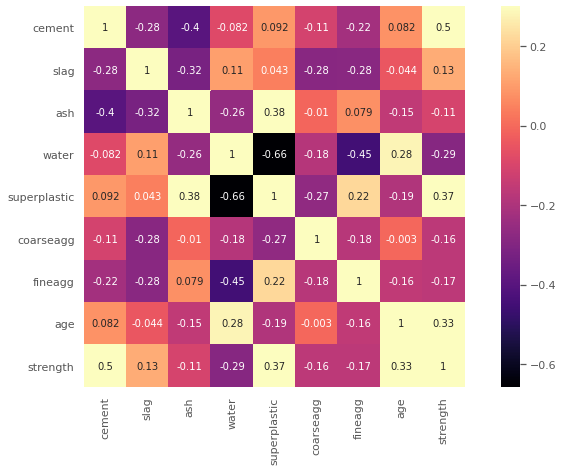

In [23]:
plt.figure(figsize=(13,7));
plt.style.use('ggplot');
sns.heatmap(corr,vmax=.3, square=True, annot = True, cmap = 'magma');

In [24]:
corr['strength'].abs()

cement          0.497832
slag            0.134829
ash             0.105755
water           0.289633
superplastic    0.366079
coarseagg       0.164935
fineagg         0.167241
age             0.328873
strength        1.000000
Name: strength, dtype: float64

<h4>Observations 3: Pair Plots and Correlation matrix</h4><br>
<ol>
    <li>In most of the 2D scatter-plots within the pair plots the data doesn't seem to be linearly distributed, <b>so quadratic or higher degree of data would help </b></li>
    <li>There is <b>no very high correlations</b> between any of the features.</li>
    <li>Some correlation is present between: 
            <ul><li><b>cement and strength</b></li>
            <li><b>superplastic and water</b></li> </ul>
    </li>
    <li>The maximun absolute correlation, target column 'strength' has is 0.497832. </li>
    <li>Based on the correlation data , <b>all features will be considered for model selection</b></li>
     
 
    
    
    
</ol>



# Finding clusters of data

In [25]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

concreteDfScaled = concreteDf.apply(zscore)

rand_state = 124

cluster_range = range(2,10)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=rand_state)
    clusters.fit(concreteDfScaled)
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df



,num_clusters,cluster_errors
0,2,7586.086427
1,3,6368.794914
2,4,5534.857990
3,5,4812.903962
4,6,4352.170216
5,7,4040.950642
6,8,3792.462664
7,9,3614.512800


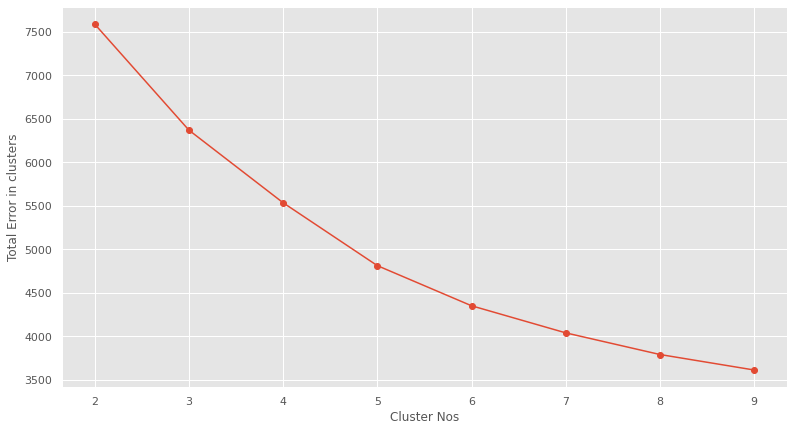

In [26]:
plt.figure(figsize=(13,7));
plt.xlabel("Cluster Nos")
plt.ylabel("Total Error in clusters")
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Slight elbow of data is seen at cluster 5 confirming with the previous observation. 


<b>Note</b>: Elbow curve doesn't have a very prominent eblow point suggesting data in different clusters might not be vastly different  

In [27]:
kmeans = KMeans(n_clusters=5, n_init = 5, random_state=rand_state)
kmeans.fit(concreteDfScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=124, tol=0.0001, verbose=0)

In [28]:
labels = kmeans.labels_

In [29]:
concreteDfScaled["group"] = labels
concreteDfScaled['group'] = concreteDfScaled['group'].astype('category')


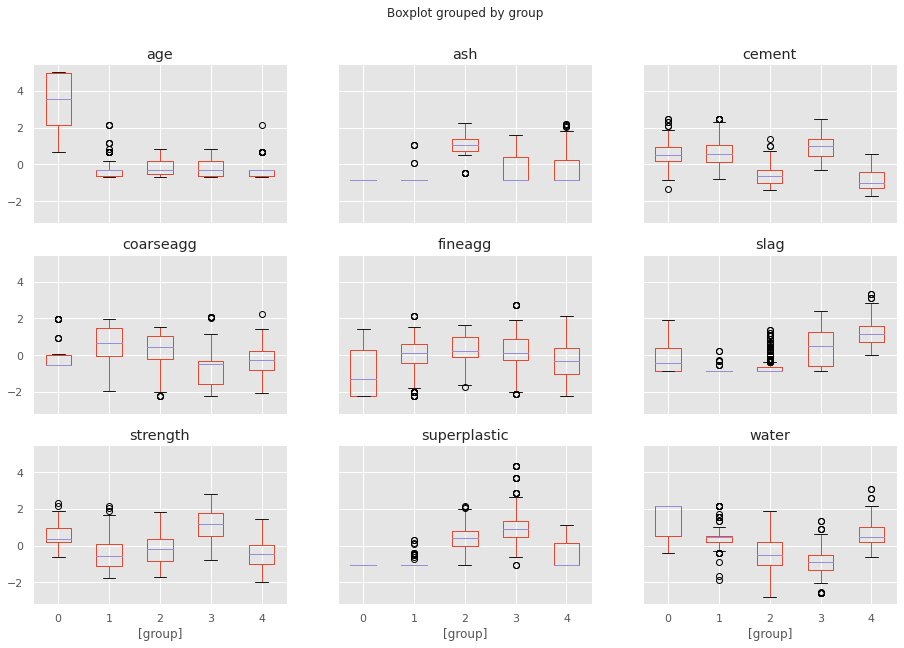

In [30]:
concreteDfScaled.boxplot(by = 'group',  layout=(3,3), figsize=(15, 10), vert = True);

<h4>Observations 4: Clustered Data</h4><br>

There isn't very high variance in data wrt. different clusters. So <b>different cluster won't have to be treated differently.</b>

<b>Seggregating training and test data</b>

In [31]:
X = concreteDfScaled.drop('strength' , axis=1)
X = X.drop('group' , axis=1)
y = concreteDfScaled['strength']


(X.shape,y.shape)

((1030, 8), (1030,))

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)


(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


((721, 8), (309, 8), (721,), (309,))

<b>Model building</b>

In [33]:
from sklearn.linear_model import LinearRegression, Ridge , Lasso , SGDRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics.scorer import make_scorer

from sklearn.metrics import r2_score, mean_squared_error


model_dict = {}
model_dict['linear_regression'] = LinearRegression()
model_dict['ridge'] = Ridge(alpha=0.1)
model_dict['lasso'] = Lasso(alpha=0.1)
model_dict['sgd_regressor'] = SGDRegressor()
model_dict['random_forest'] = RandomForestRegressor(random_state=rand_state)
model_dict['adaboost_regressor'] = AdaBoostRegressor(random_state=rand_state)
model_dict['decision_tree_regressor'] = DecisionTreeRegressor(random_state=rand_state)
model_dict['gradient_boosting_regressor'] = GradientBoostingRegressor(random_state=rand_state)
model_dict['svr'] = SVR()
model_dict['knn_regressor'] = KNeighborsRegressor()


r2_scoring = make_scorer(r2_score)
mse_scoring = make_scorer(mean_squared_error)


lables = []
all_mean_r2 = []
all_std_r2 = []
all_mean_mse = []

print("Analysis of models:")
for label , model in model_dict.items():
    k_fold = KFold(n_splits=10)
    r2_cv = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=r2_scoring)
    mse_cv = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=mse_scoring)
    
    mean_r2 = r2_cv.mean()
    std_r2 = r2_cv.std()
    mean_mse = mse_cv.mean()
    
    lables.append(label)
    all_mean_r2.append(round(mean_r2,2))
    all_std_r2.append(round(std_r2,2))
    all_mean_mse.append(round(mean_mse,2))
    print("Model: %s , Mean R2 score : %f , Std R2 : %f, Mean MSE : %f" % (label, mean_r2, std_r2,mean_mse))

    
resultsDf = pd.DataFrame({"name": lables, "r2": all_mean_r2 , "std r2": all_std_r2 , "mse":mean_mse})



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Analysis of models:
Model: linear_regression , Mean R2 score : 0.581121 , Std R2 : 0.060310, Mean MSE : 0.409227
Model: ridge , Mean R2 score : 0.581136 , Std R2 : 0.060269, Mean MSE : 0.409220
Model: lasso , Mean R2 score : 0.503991 , Std R2 : 0.055223, Mean MSE : 0.489845
Model: sgd_regressor , Mean R2 score : 0.574664 , Std R2 : 0.061629, Mean MSE : 0.416365
Model: random_forest , Mean R2 score : 0.892912 , Std R2 : 0.027326, Mean MSE : 0.105189
Model: adaboost_regressor , Mean R2 score : 0.771137 , Std R2 : 0.044897, Mean MSE : 0.223096
Model: decision_tree_regressor , Mean R2 score : 0.802805 , Std R2 : 0.073046, Mean MSE : 0.190355
Model: gradient_boosting_regressor , Mean R2 score : 0.887135 , Std R2 : 0.026815, Mean MSE : 0.111076
Model: svr , Mean R2 score : 0.822074 , Std R2 : 0.038120, Mean MSE : 0.176268
Model: knn_regressor , Mean R2 score : 0.695970 , Std R2 : 0.069875, Mean MSE : 0.297175


In [34]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<b>Printing the result dataframe</b>

In [35]:
resultsDf.sort_values(by=['r2', 'mse'],ascending=False)

,name,r2,std r2,mse
4,random_forest,0.890,0.030,0.297
7,gradient_boosting_regressor,0.890,0.030,0.297
8,svr,0.820,0.040,0.297
6,decision_tree_regressor,0.800,0.070,0.297
5,adaboost_regressor,0.770,0.040,0.297
9,knn_regressor,0.700,0.070,0.297
0,linear_regression,0.580,0.060,0.297
1,ridge,0.580,0.060,0.297
3,sgd_regressor,0.570,0.060,0.297
2,lasso,0.500,0.060,0.297


<h4>Observations 5: Best Models</h4><br>

<b> RandomForestRegressor and GradientBoostingRegressor</b> are found to have the best R2 scores without any hyperparameter tuning .

Selecting RandomForestRegressor and GradientBoostingRegressor for hyperparameter tuning

# Feature Importance

In [36]:
model_dict = {}
model_dict['gradient_boosting_regressor'] = GradientBoostingRegressor(random_state=rand_state)
model_dict['random_forest'] = RandomForestRegressor(random_state=rand_state)


feature_importance_df = pd.DataFrame([],index=x_train.columns)

for label , model in model_dict.items():
    model.fit(x_train, y_train)
    feature_importance = model.feature_importances_

    feature_importance_df[type(model).__name__] = feature_importance



In [37]:
feature_importance_df.sort_values(by='GradientBoostingRegressor',ascending=False,inplace=True)

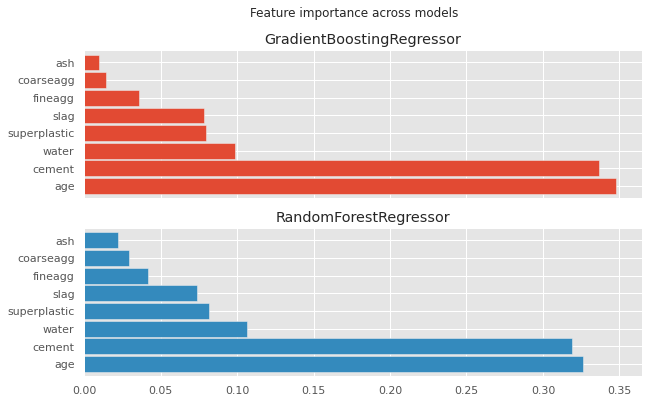

In [38]:
plt.style.use('ggplot')
feature_importance_df.plot(kind = 'barh',figsize = (10,6), subplots=True, width = 0.9,
                    title = 'Feature importance across models',legend = False);

<h4>Observations 6: Feature Importance</h4><br>

<b> Age </b> followed by <b>cement</b> have been given the highest importance in both the models , with <b>'ash' </b> contibuting least to the model score.

# Tuning Hyperparameters

In [43]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

<b>Tuning gradient boosting: </b>

In [48]:

gradient_boosting_grid = RandomizedSearchCV(GradientBoostingRegressor(),{'learning_rate': [0.1, 0.05, 0.02, 0.01],'max_depth': list(range(2,15)),
                                                  'min_samples_leaf': list(range(5, 150, 15)), 'max_features': list(range(1,9))}, cv = 10)

In [49]:
gradient_boosting_grid.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [50]:
gradient_boosting_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 50}

In [52]:
print(gradient_boosting_grid.best_estimator_) 
print(gradient_boosting_grid.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=6, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.9004548011878948


In [54]:
random_forest_grid = RandomizedSearchCV(RandomForestRegressor(),{'max_depth': [2,3,4,None], 'n_estimators': [10, 30, 50, 100, 200, 400, 600, 800, 1000],'max_features': list(range(1,9))},cv = 10)

In [55]:
random_forest_grid.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [56]:
random_forest_grid.best_params_

{'max_depth': None, 'max_features': 8, 'n_estimators': 400}

In [57]:
print(random_forest_grid.best_estimator_) 
print(random_forest_grid.best_score_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
0.895815071365152


Conclusion: GradientBoosting is the best fit model 

In [61]:
final_model = GradientBoostingRegressor(learning_rate= 0.1,max_depth= 8,max_features= 6,min_samples_leaf= 50,random_state=rand_state)

In [63]:
final_model.fit(x_train, y_train)
final_model.predict(x_test)
final_model.score(x_test, y_test)

0.9125668003369606

## Model performance range at 95% confidence level

In [64]:
n_iterations = 1000
n_size = int(len(X)*0.67)

In [65]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
stats1 = list()
stats2 = list()
for i in range(n_iterations):
    #preparing train & test sets
    train = resample(X.values, n_samples = n_size)
    test = np.array([X for X in X.values if X.tolist() not in train.tolist()])
    #specifying & fitting the model
    model = final_model
    model.fit(train[:,:-1],train[:,-1])
    #evaluating model
    predictions = model.predict(test[:,:-1])
    #score = model.score(test[:, -1], predictions)
    score1 = r2_score(test[:,-1], predictions)
    stats1.append(score1)
    score2 = mean_squared_error(test[:,-1], predictions)
    stats2.append(score2)

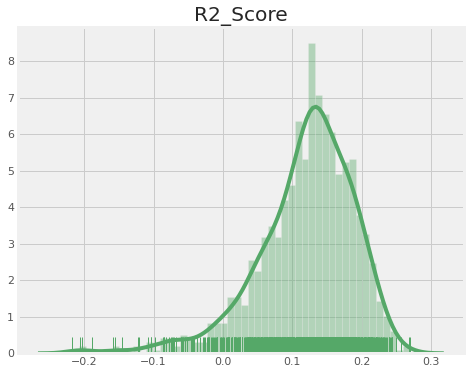

In [66]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.title('R2_Score')
sns.distplot(stats1, bins=50, rug = True, color = 'g')

In [68]:
from scipy import stats
n = len(stats1)
conf = 0.95
x_bar = np.mean(stats1) #average r2_score
std = np.std(stats1) # r2_score standard deviation
z_critical = stats.norm.ppf(q = 0.975) # 0.975 is arrived as (1-alpha(0.05)/2) as we need spread 0.5 on both the sides.
z_critical

1.959963984540054

In [69]:
z_interval = stats.norm.interval(alpha=conf)
z_interval

(-1.959963984540054, 1.959963984540054)

In [70]:
r2_std_error = std/np.sqrt(n)
r2_std_error

0.00222574811295134

In [71]:
R2_CI_lower = x_bar - z_critical * r2_std_error
R2_CI_upper = x_bar + z_critical * r2_std_error
R2_CI_lower,R2_CI_upper

(0.11517202967145458, 0.1238968019515398)

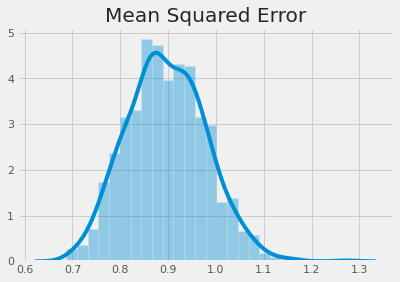

In [72]:
plt.title("Mean Squared Error")
sns.distplot(stats2)

In [73]:
np.mean(stats2)

0.8964837107643052

In [74]:
mse_std = np.std(stats2)
mse_std_error = mse_std/np.sqrt(n)
mse_std_error

0.002600619094019878

In [75]:
mse_CI_lower = np.mean(stats2) - z_critical * mse_std_error
mse_CI_upper = np.mean(stats2) + z_critical * mse_std_error
mse_CI_lower, mse_CI_upper

(0.891386591002519, 0.9015808305260914)

Model performance range at 95% confidence level is : (0.891386591002519, 0.9015808305260914)